##**Please run the following code in TPU for faster results**
###**Click on the drop-down arrow beside Ram-Disk utilization image and change runtime type to TPU v2.**

##**Installing the DeepXDE Library, we will use this library to implement the DeepONet Framework**

In [ ]:
pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.7/183.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.4 MB/s eta 0:00:00


##**Importing all the required libraries**




In [ ]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import pandas as pd


No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)






##**The parametric Heat Equation is U<sub>t</sub> = c.U<sub>xx</sub>.**
###**We build our model for different values of 'c' each time and test it at various timestamps 'T'.**

###**'x_test' gives us the various points at which we get to test aur model.**


In [ ]:
# Define the parameter c, initial conditions, and times for evaluation
C = [1.2, 1.5, 1.8, 2.5]  # Different values of the parameter c
T = [0, 0.025, 0.05, 0.075, 0.1]  # Times at which we want to evaluate the solution
x_test = np.linspace(0, 2, 100)[:, None]  # Test points in the spatial domain



##**Defining the parametric heat equation to be given as input to the model.**

##**Then we define the boundary conditions:**

##𝑢(𝑥, 0) = sin(𝜋𝑥),

##𝑢(0, 𝑡) = 𝑢(2, 𝑡) = 0.





In [ ]:
# Define the PDE u_t = c * u_xx
def heat_equation_parametric(x, u, c):
    u_t = dde.grad.jacobian(u, x, i=0, j=1)  # ∂u/∂t
    u_xx = dde.grad.hessian(u, x, component=0, i=0)  # ∂²u/∂x²
    return u_t - c * u_xx

# Define boundary conditions: u(0, t) = u(2, t) = 0
def boundary_left_right(x, on_boundary):
    return on_boundary and (np.isclose(x[0], 0) or np.isclose(x[0], 2))



####**Spatial Domain**:Defines the range for the spatial variable 𝑥.

####**Temporal Domain**: Defines the range for the time variable 𝑡.

####**Combined Space-Time Domain**: Creates a 2D domain combining space and time.

####**Boundary Condition Function**: Specifies that the solution is zero at the boundaries 𝑥 = 0 and 𝑥 = 2.

####**Apply Boundary Condition**: Enforces the Dirichlet boundary condition over the space-time domain.

In [ ]:
# Define the geometry and time domain
geom = dde.geometry.Interval(0, 2)
timedomain = dde.geometry.TimeDomain(0, 0.1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)
# Dirichlet boundary condition
bc = dde.DirichletBC(geomtime, lambda x: 0, boundary_left_right)



##**calculate_mse calculates the mean squared error between the model predicted solution and actual solution at the points**

In [ ]:
# Function to calculate the mean squared error
def calculate_mse(u_pred, u_true):
    return mean_squared_error(u_true, u_pred)

## **We define an error_matrix which stores the error at different 'c' vs 'T'**

In [ ]:
# Initialize an empty DataFrame to store the errors
error_matrix = pd.DataFrame(index=range(4), columns=range(5))


####**We run the loop for different values of 'c' in the list C**


*  In each iteration we train aur model which takes the following as input:
**   Heat Equation PDE defined earlier.
**   Intial Boundary Conditions.
**   Space-Time Domain
**   Number of points at Domain, Boundary and at Initial Condition


*  Finally we test aur model at various 'T'.
*  We Calculate the error at each 'T' for each 'c'.
*  We print the graphs.





Compiling model...
Building feed-forward neural network...
'build' took 0.058434 s

'compile' took 0.635911 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [9.18e-02, 4.83e-03, 4.72e-01]    [9.18e-02, 4.83e-03, 4.72e-01]    []  
1000      [1.47e-02, 1.17e-02, 9.15e-03]    [1.47e-02, 1.17e-02, 9.15e-03]    []  
2000      [2.82e-03, 3.15e-03, 1.45e-03]    [2.82e-03, 3.15e-03, 1.45e-03]    []  
3000      [2.30e-03, 1.88e-03, 6.72e-04]    [2.30e-03, 1.88e-03, 6.72e-04]    []  
4000      [1.53e-03, 1.31e-03, 4.24e-04]    [1.53e-03, 1.31e-03, 4.24e-04]    []  
5000      [6.41e-04, 8.99e-04, 2.53e-04]    [6.41e-04, 8.99e-04, 2.53e-04]    []  
6000      [1.89e-03, 7.09e-04, 1.82e-04]    [1.89e-03, 7.09e-04, 1.82e-04]    []  
7000      [5.84e-03, 5.78e-04, 1.60e-04]    [5.84e-03, 5.78e-04, 1.60e-04]    []  
8000      [3.65e-04, 3.72e-04, 1.18e-04]    [3.65e-04, 3.72e-04, 1.18e-04]    []  
9000      [3.58e-03, 2.84e-04, 1.

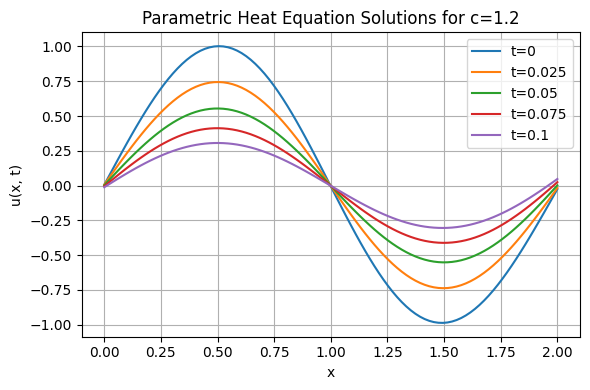

Compiling model...
Building feed-forward neural network...
'build' took 0.060753 s

'compile' took 0.680963 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.82e-04, 5.96e-03, 5.35e-01]    [5.82e-04, 5.96e-03, 5.35e-01]    []  
1000      [5.97e-03, 3.37e-02, 4.02e-02]    [5.97e-03, 3.37e-02, 4.02e-02]    []  
2000      [4.13e-03, 9.01e-03, 8.52e-03]    [4.13e-03, 9.01e-03, 8.52e-03]    []  
3000      [2.36e-03, 3.82e-03, 2.05e-03]    [2.36e-03, 3.82e-03, 2.05e-03]    []  
4000      [1.52e-03, 1.92e-03, 8.44e-04]    [1.52e-03, 1.92e-03, 8.44e-04]    []  
5000      [1.08e-03, 1.09e-03, 3.96e-04]    [1.08e-03, 1.09e-03, 3.96e-04]    []  
6000      [3.68e-03, 6.45e-04, 1.82e-04]    [3.68e-03, 6.45e-04, 1.82e-04]    []  
7000      [1.28e-03, 4.31e-04, 1.50e-04]    [1.28e-03, 4.31e-04, 1.50e-04]    []  
8000      [9.20e-03, 2.55e-04, 2.03e-04]    [9.20e-03, 2.55e-04, 2.03e-04]    []  
9000      [7.78e-03, 3.35e-04, 9.

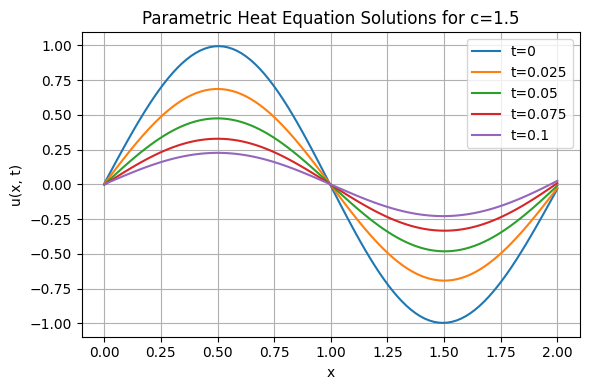

Compiling model...
Building feed-forward neural network...
'build' took 0.057130 s

'compile' took 0.692034 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.26e-02, 1.54e-03, 4.85e-01]    [5.26e-02, 1.54e-03, 4.85e-01]    []  
1000      [9.08e-03, 2.76e-02, 3.63e-02]    [9.08e-03, 2.76e-02, 3.63e-02]    []  
2000      [3.73e-03, 4.45e-03, 4.79e-03]    [3.73e-03, 4.45e-03, 4.79e-03]    []  
3000      [1.50e-03, 1.17e-03, 5.23e-04]    [1.50e-03, 1.17e-03, 5.23e-04]    []  
4000      [8.45e-03, 6.52e-04, 1.91e-04]    [8.45e-03, 6.52e-04, 1.91e-04]    []  
5000      [1.70e-03, 3.08e-04, 6.72e-05]    [1.70e-03, 3.08e-04, 6.72e-05]    []  
6000      [3.07e-03, 2.10e-04, 4.43e-05]    [3.07e-03, 2.10e-04, 4.43e-05]    []  
7000      [4.85e-04, 1.81e-04, 6.74e-05]    [4.85e-04, 1.81e-04, 6.74e-05]    []  
8000      [5.69e-03, 2.46e-04, 1.87e-04]    [5.69e-03, 2.46e-04, 1.87e-04]    []  
9000      [1.61e-02, 7.08e-05, 2.

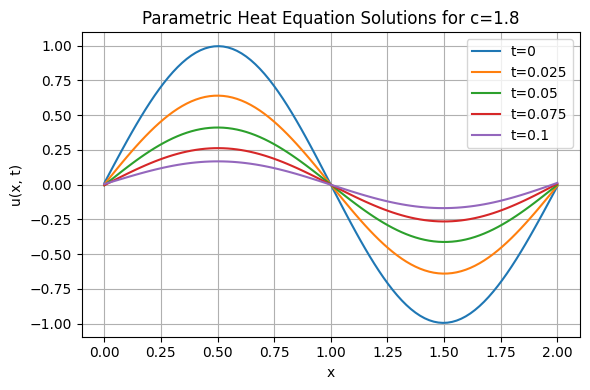

Compiling model...
Building feed-forward neural network...
'build' took 0.059202 s

'compile' took 0.727470 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [9.77e-01, 5.52e-01, 1.27e+00]    [9.77e-01, 5.52e-01, 1.27e+00]    []  
1000      [8.10e-03, 5.22e-02, 1.90e-01]    [8.10e-03, 5.22e-02, 1.90e-01]    []  
2000      [7.46e-03, 4.39e-02, 6.45e-02]    [7.46e-03, 4.39e-02, 6.45e-02]    []  
3000      [1.05e-02, 2.10e-02, 2.72e-02]    [1.05e-02, 2.10e-02, 2.72e-02]    []  
4000      [1.08e-02, 9.43e-03, 1.07e-02]    [1.08e-02, 9.43e-03, 1.07e-02]    []  
5000      [5.28e-03, 3.34e-03, 3.96e-03]    [5.28e-03, 3.34e-03, 3.96e-03]    []  
6000      [2.76e-03, 1.46e-03, 1.21e-03]    [2.76e-03, 1.46e-03, 1.21e-03]    []  
7000      [5.97e-03, 8.87e-04, 5.14e-04]    [5.97e-03, 8.87e-04, 5.14e-04]    []  
8000      [5.77e-03, 4.18e-04, 2.31e-04]    [5.77e-03, 4.18e-04, 2.31e-04]    []  
9000      [3.36e-03, 3.15e-04, 1.

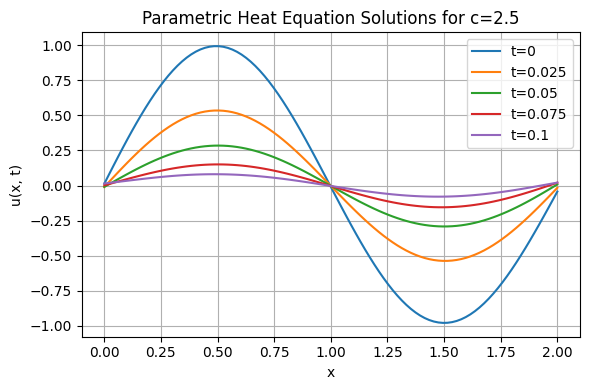

In [ ]:
# Iterate over different values of c
for row, c in enumerate(C):
    # Define the initial condition u(x, 0) = sin(pi * x)
    def initial_condition(x):
        return np.sin(np.pi * x[:, 0:1])

    # Initial condition setup
    ic = dde.IC(geomtime, initial_condition, lambda _, on_initial: on_initial)

    # Define the PDE with the current value of c
    def heat_eq(x, u):
        return heat_equation_parametric(x, u, c)

    # Data setup
    data = dde.data.TimePDE(
        geomtime,
        heat_eq,
        [bc, ic],
        num_domain=4000,
        num_boundary=400,
        num_initial=50,
    )

    # Define the neural network
    net = dde.maps.FNN([2] + [50] * 4 + [1], "tanh", "Glorot normal")
    model = dde.Model(data, net)

    # Compile and train the model
    model.compile("adam", lr=1e-3)
    model.train(iterations=10000)

    # Save the model
    model_name = f"parametric_heat_eq_model_c_{c}.ckpt"
    model.save(model_name)

    # Plot the results and calculate errors for different times
    plt.figure(figsize=(6, 4))
    for col, t in enumerate(T):
        X_test = np.hstack((x_test, t * np.ones((len(x_test), 1))))
        u_pred = model.predict(X_test).reshape(len(x_test))
        u_true = np.sin(np.pi * x_test) * np.exp(-c * np.pi**2 * t)

        plt.plot(x_test, u_pred, label=f"t={t}")
        error = calculate_mse(u_pred, u_true)
        error_matrix.iloc[row, col] = error

    # Customize and show the plot for the current value of 'c'
    plt.title(f"Parametric Heat Equation Solutions for c={c}")
    plt.xlabel("x")
    plt.ylabel("u(x, t)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



**We print the error_matrix**

In [ ]:
# Set column headers for the error matrix
error_matrix.columns = ['T = 0', 'T = 0.025', 'T = 0.05', 'T = 0.075', 'T = 0.1']

# Set row headers
error_matrix.index = ['c = 1.2', 'c = 1.5', 'c = 1.8', 'c = 2.5']

# Display the DataFrame with errors
print(error_matrix)

            T = 0 T = 0.025  T = 0.05 T = 0.075   T = 0.1
c = 1.2   0.00012  0.000023  0.000003  0.000026   0.00013
c = 1.5  0.000086  0.000055  0.000023  0.000006  0.000034
c = 1.8  0.000017  0.000005  0.000003  0.000004  0.000011
c = 2.5  0.000219  0.000039  0.000025  0.000046  0.000066
